In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def trajectory(subj, run, allXY_pad=87300, sample_sec=0.0167, cursor_traj=False):
    # load dataset
    behav_data = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/%s/%s-fmri.mat' % (subj, subj))
    
    # preprocessing
    allXY = behav_data['allXY'][:, :allXY_pad]
    
    return allXY

def trajectory2(subj, run, allXY_pad=87300, sample_sec=0.0167, cursor_traj=False):
    # load dataset
    behav_data = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/%s/%s-refmri.mat' % (subj, subj))
    
    # preprocessing
    allXY = behav_data['allXY'][:, :allXY_pad]
    
    return allXY

def trajectory3(subj, run, allXY_pad=87300, sample_sec=0.0167, cursor_traj=False):
    # load dataset
    behav_data = scipy.io.loadmat('/Volumes/clmnlab/GA/behavior_data/%s/%s-4-behav.mat' % (subj, subj))
    
    # preprocessing
    allXY = behav_data['allXY'][:, :allXY_pad]
    
    return allXY

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
subj_list = [
    'GA01', 'GA02', 'GA05', 'GA07', 'GA08', 'GA11', 'GA12', 'GA13', 'GA14', 'GA15',
    'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 'GA26', 'GA27', 'GA28', 'GA29', 'GA30',
    'GA31', 'GA32', 'GA33', 'GA34', 'GA35', 'GA36', 'GA37', 'GA38', 'GA42', 'GA44',
]

results = {}

for subj in subj_list:
    allXY = trajectory(subj, 1, allXY_pad=87300*2)

    results[subj, 'early'] = (
        allXY[:, :97*300],
        allXY[:, 97*300:97*300*2],
        allXY[:, 97*300*2:97*300*3],
        allXY[:, 97*300*3:97*300*4],
        allXY[:, 97*300*4:97*300*5],
        allXY[:, 97*300*5:97*300*6],
    )
    
    allXY = trajectory2(subj, 1, allXY_pad=87300*2)

    results[subj, 'late'] = (
        allXY[:, :97*300],
        allXY[:, 97*300:97*300*2],
        allXY[:, 97*300*2:97*300*3],
        allXY[:, 97*300*3:97*300*4],
        allXY[:, 97*300*4:97*300*5],
        allXY[:, 97*300*5:97*300*6],
    )
    
    allXY = trajectory3(subj, 1)

    results[subj, 'inter'] = (
        allXY[:, :97*300],
        allXY[:, 97*300:97*300*2],
        allXY[:, 97*300*2:97*300*3],
    )

In [4]:
results['GA01', 'early'][0].shape

(2, 29100)

In [6]:
97 * 3 * 6 + 97 * 2, 97 * 3 * 7

(1940, 2037)

In [44]:
def draw_trajectory(subj, stage, run):
    xs = []
    ys = []
    cs = []
    
    allXY = results[subj, stage][run]

    for i in range(0, allXY.shape[1], 2):
        x = allXY[0, i]
        y = allXY[1, i]

        xs.append(-x)
        ys.append(-y)
    
    fig, ax = plt.subplots(figsize=(5, 5))
        
    for s in range(0, len(xs), 30):
        #plt.scatter(xs, ys, c='k', alpha=0.5)
        plt.plot(xs[s:s+31], ys[s:s+31], 'k-', alpha=0.3)
        #plt.plot(xs, ys, 'k.', alpha=0.5)

    plt.xlim(420, -420)
    plt.ylim(420, -420)
    
    plt.show()
    
    return fig

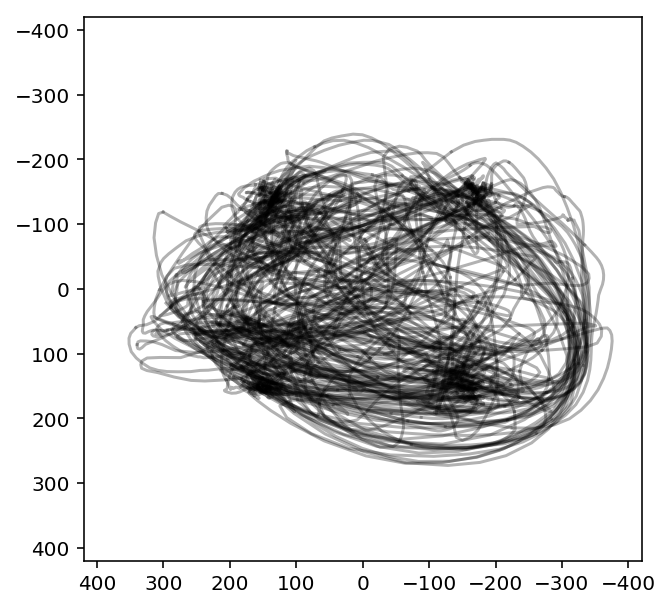

In [45]:
fig = draw_trajectory('GA27', 'early', 0)
fig.savefig('20200403_trajectory_GA27_early.png', dpi=300)

In [39]:
#draw_trajectory('GA27', 'inter', 1)

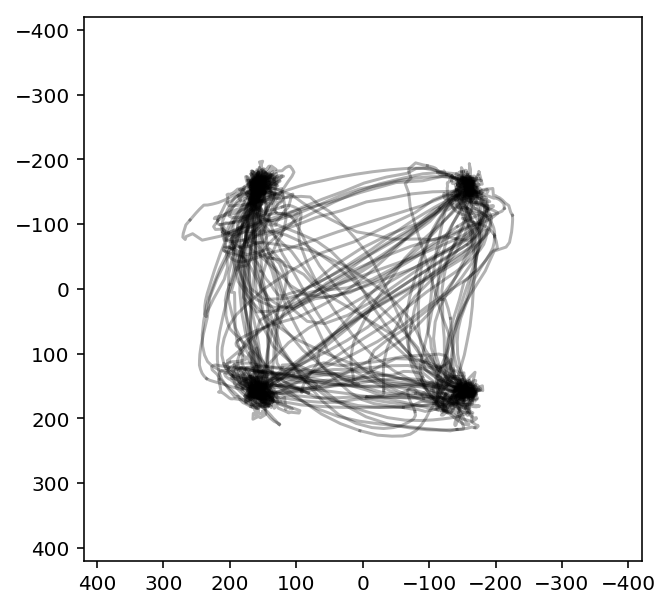

In [46]:
fig = draw_trajectory('GA27', 'late', 2)
fig.savefig('20200403_trajectory_GA27_late.png', dpi=300)